## Observations and Insights 

1. Ramicane looks to be the the most promising treatment regimen as it had the lowest median tumor volume after 45 days of treatment and there were no outliers.
2. The correlation coefficient (0.84) between mouse weight and average tumor volume while on the Capomulin regimen suggests a strong positive relationship between the two measures.
3. Mouse s185 was treated with Capomulin for 45 days. The largest change in tumor volume occurred between days 5 and 10. Then, curiously, the tumor volume increased slightly between days 10 and 15.

In [49]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df=mouse_metadata.merge(study_results,on='Mouse ID')
# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [50]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. 
df_unique=df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
df_unique.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary Statistics

In [51]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
df_summary=df_unique[['Drug Regimen', 'Tumor Volume (mm3)']].groupby(['Drug Regimen']).mean().rename(columns={"Tumor Volume (mm3)":"Mean"})
df_summary["Median"]=df_unique[['Drug Regimen', 'Tumor Volume (mm3)']].groupby(['Drug Regimen']).median()
df_summary["Variance"]=df_unique[['Drug Regimen', 'Tumor Volume (mm3)']].groupby(['Drug Regimen']).var()
df_summary["STDEV"]=df_unique[['Drug Regimen', 'Tumor Volume (mm3)']].groupby(['Drug Regimen']).std()
df_summary["SEM"]=df_unique[['Drug Regimen', 'Tumor Volume (mm3)']].groupby(['Drug Regimen']).sem()
df_summary

,Mean,Median,Variance,STDEV,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [52]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
df_summary2=df_unique[['Drug Regimen', 'Tumor Volume (mm3)']].groupby(['Drug Regimen']).agg(['mean', 'median','var','std','sem'])
df_summary2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<IPython.core.display.Javascript object>


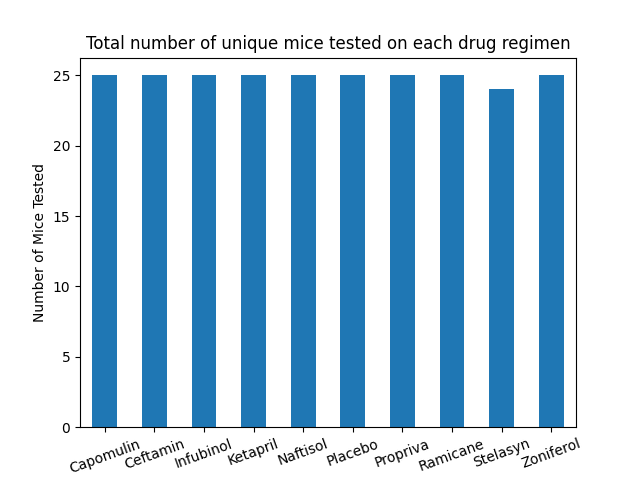

In [53]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

df_unique_bar=df.drop_duplicates(subset=['Mouse ID','Drug Regimen'], keep='first')
df_group_bar=df_unique_bar[['Drug Regimen', 'Mouse ID']].groupby('Drug Regimen').count()
fig_bar_pd=df_group_bar.plot.bar(ylabel="Number of Mice Tested", rot=20, legend=False,title="Total number of unique mice tested on each drug regimen")


<IPython.core.display.Javascript object>


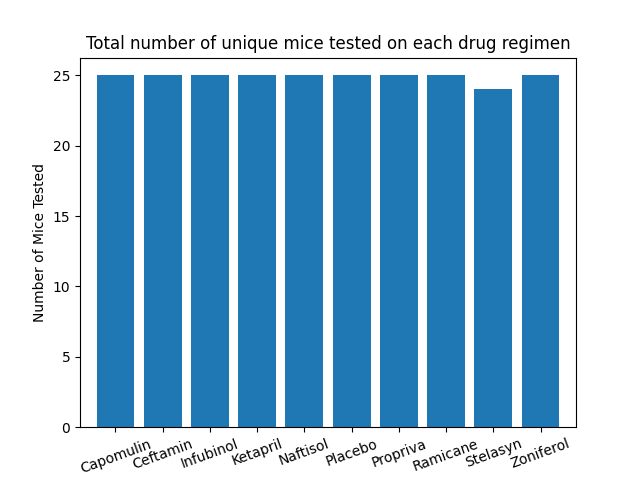

In [54]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

regimens = df_group_bar.index
mice=df_group_bar["Mouse ID"]
x=[]
for each in regimens:
    x.append(each)

x_axis=np.arange(len(regimens))

pyplot_bar = plt.figure()
fig_bar_plt = pyplot_bar.add_subplot()

tick_locs=[value for value in x_axis]
plt.xticks(tick_locs,x, rotation=20)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.title('Total number of unique mice tested on each drug regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
fig_bar_plt.bar(x_axis,mice,  align="center")
plt.show()


<IPython.core.display.Javascript object>


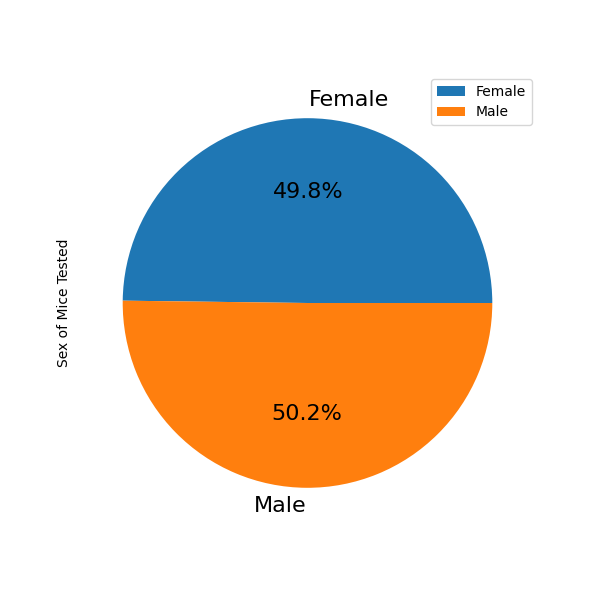

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

df_unique_pie=df.drop_duplicates(subset=['Mouse ID'], keep='first')
df_group_pie=df_unique_pie[['Sex','Mouse ID']].groupby('Sex').count().rename(columns={'Mouse ID': 'Sex of Mice Tested'})
fig_pie_pd = df_group_pie.plot.pie(y='Sex of Mice Tested',figsize=(6,6),autopct='%1.1f%%',fontsize=16)


<IPython.core.display.Javascript object>


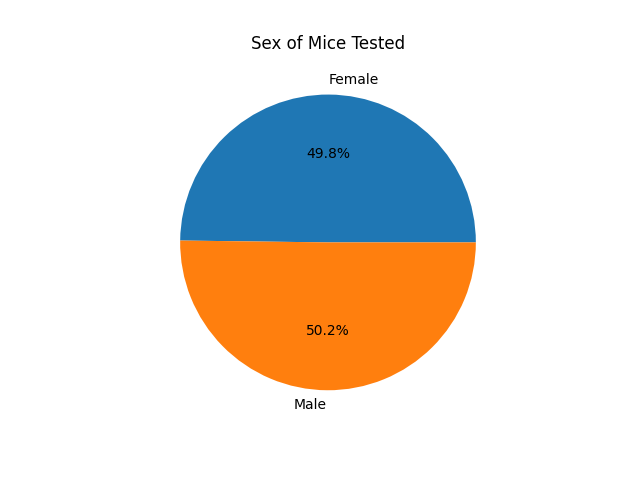

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt_pie_fig = plt.figure()
plt_pie_ax = plt_pie_fig.add_subplot()

x=df_group_pie['Sex of Mice Tested']
y=df_group_pie.index
plt.title('Sex of Mice Tested')
plt_pie_ax.pie(x,labels=y,autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [57]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
df_greatest = df_unique.groupby('Mouse ID').agg({'Timepoint':['max']}).copy()
df_greatest.columns = df_greatest.columns.get_level_values(0)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
df_vol = df_greatest.merge(df_unique, how='left', left_on=['Mouse ID', 'Timepoint'], right_on=['Mouse ID', 'Timepoint'])
df_vol = df_vol[['Drug Regimen','Tumor Volume (mm3)']]
df_vol

,Drug Regimen,Tumor Volume (mm3)
0,Infubinol,67.973419
1,Infubinol,65.525743
2,Placebo,70.717621
3,Ceftamin,62.999356
4,Stelasyn,63.440686
...,...,...
244,Propriva,48.710661
245,Ramicane,30.638696
246,Infubinol,62.754451
247,Naftisol,65.741070


In [58]:
# Put treatments into a list for for loop (and later for plot labels)
labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in enumerate(labels):
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    df_rows = df_vol.loc[df_vol['Drug Regimen'] == i[1],['Tumor Volume (mm3)']]
    # rows = df_rows.set_index(['Tumor Volume (mm3)'], inplace=True)
    rows = df_rows.squeeze('columns')
    
    # add subset 
    vol_data.append(rows)
    
    # Determine outliers using upper and lower bounds
    q1 = np.quantile(rows, 0.25)
    q3 = np.quantile(rows, 0.75)
    iqr = q3 - q1

    lowerB = q1 - (1.5 * iqr)
    upperB = q3 + (1.5 * iqr)

    outliers_df = rows[(rows.values<= lowerB) | (rows.values >= upperB)]
    outliers_df = outliers_df.round(6)
    outliers = outliers_df.values.tolist()

    print(f"Regimen: {i[1]} \n IQR: {round(iqr.item(),6)} \n lower bound: {round(lowerB.item(),6)} \n upper bound: {round(upperB.item(),6)}")
    if (len(outliers)>0):
        print("Outliers: {} \n**********".format(outliers))
    else:
        print(f"Outliers: NONE \n**********")

Regimen: Capomulin 
 IQR: 7.781863 
 lower bound: 20.704562 
 upper bound: 51.832015
Outliers: NONE 
**********
Regimen: Ramicane 
 IQR: 9.098537 
 lower bound: 17.912664 
 upper bound: 54.306811
Outliers: NONE 
**********
Regimen: Infubinol 
 IQR: 11.477135 
 lower bound: 36.832905 
 upper bound: 82.741446
Outliers: [36.321346] 
**********
Regimen: Ceftamin 
 IQR: 15.577752 
 lower bound: 25.35545 
 upper bound: 87.666458
Outliers: NONE 
**********


<IPython.core.display.Javascript object>


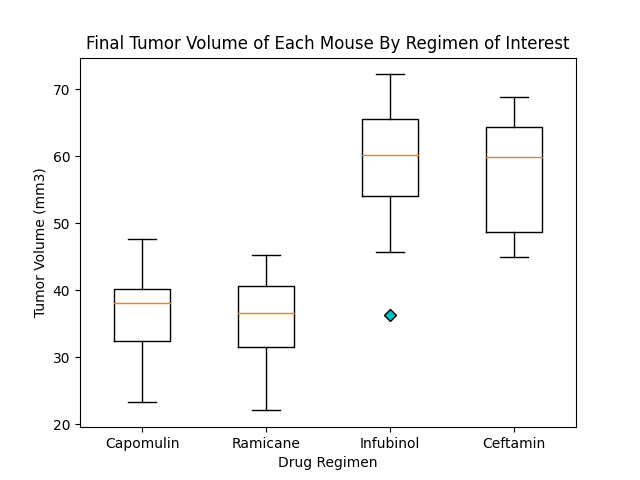

In [59]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt_box_fig = plt.figure()
plt_box_ax = plt_box_fig.add_subplot()

cyan_diamond = dict(markerfacecolor='c', marker='D')
plt.title("Final Tumor Volume of Each Mouse By Regimen of Interest")
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt_box_ax.boxplot(vol_data, labels=labels, flierprops=cyan_diamond)
plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


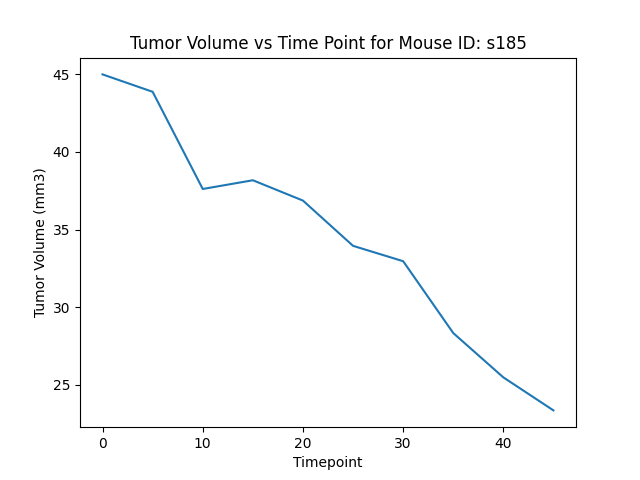

In [60]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt_line_fig = plt.figure()
plt_line_ax = plt_line_fig.add_subplot()

df_rows = df_unique.loc[df_unique['Drug Regimen'] == 'Capomulin',['Mouse ID','Tumor Volume (mm3)', 'Timepoint']]
mouse = df_rows[0:1]['Mouse ID'].squeeze()
mouse_df = df_rows.loc[df_rows["Mouse ID"]==mouse, ['Tumor Volume (mm3)', 'Timepoint']]
mouse_x = mouse_df[['Timepoint']].values.tolist()
mouse_y = mouse_df[['Tumor Volume (mm3)']].values.tolist()

plt.title("Tumor Volume vs Time Point for Mouse ID: " + mouse)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt_line_ax.plot(mouse_x, mouse_y)
plt.show()

<IPython.core.display.Javascript object>


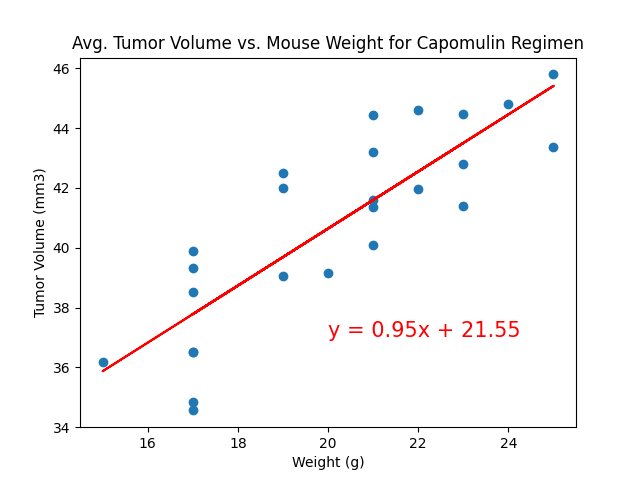

In [61]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

plt_scatter_fig = plt.figure()
plt_scatter_ax = plt_scatter_fig.add_subplot()

df_rows = df_unique.loc[df_unique['Drug Regimen'] == 'Capomulin',['Mouse ID','Tumor Volume (mm3)', 'Weight (g)']]
df_group_scatter = df_rows.groupby('Mouse ID').agg({'Tumor Volume (mm3)':np.mean, 'Weight (g)':['max']}).copy()
df_group_scatter.columns = df_group_scatter.columns.get_level_values(0)
# mouse_df = df_rows.loc[df_rows["Mouse ID"]==mouse, ['Tumor Volume (mm3)', 'Weight (g)']]
mouse_x = df_group_scatter[['Weight (g)']].values.tolist()
mouse_y = df_group_scatter[['Tumor Volume (mm3)']].values.tolist()

# axScatter.set_title("Tumor Volume vs Time Point for Mouse ID: " + mouse)
# axScatter.plot(mouse_x, mouse_y)
# plt.show()
plt.title("Avg. Tumor Volume vs. Mouse Weight for Capomulin Regimen")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt_scatter_ax.scatter(mouse_x, mouse_y)

plt.show()

## Correlation and Regression

In [62]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

i = np.arange(len(mouse_x))
x=[]
y=[]
for each in i:
    x_i = float(mouse_x[each][0])
    y_i = mouse_y[each][0]
    
    x.append(x_i)
    y.append(y_i)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The correlation coefficient is: {round(rvalue,2)}")
print(f"The r-squared is: {round(rvalue**2,2)}")
print(f"The linear regression equation is: {line_eq}")


The correlation coefficient is: 0.84
The r-squared is: 0.71
The linear regression equation is: y = 0.95x + 21.55


In [63]:
regress_values = []

for each in x:
    rv = each * slope + intercept
    regress_values.append(rv)

plt.plot(x, regress_values,"r-")
plt.annotate(line_eq, (20,37), fontsize=15, color='red')
plt.show()